BIG DATA ANALYTICS


Mugilarasan Selvaraj - 455154

In [1]:
pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.0-py2.py3-none-any.whl size=317425345 sha256=91425e12b35df63ac6b42b8cb59c50a06899ad0cb3726b9f4e1b7956297ad962
  Stored in directory: /root/.cache/pip/wheels/41/4e/10/c2cf2467f71c678cfc8a6b9ac9241e5e44a01940da8fbb17fc
Successfully built pyspark


Loading the necessary libraries for the assignement.

In [2]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from pyspark.ml.feature import StringIndexer
from pyspark.ml.recommendation import ALS
from pyspark.ml.evaluation import RegressionEvaluator

In this assignment we will get some visuvalization approach of the dataset that we are using

I loaded the 6 dataset by giving a numerical value of the dataset.

In [4]:
spark = SparkSession.builder.appName("MovieRecommendationAnalysis").getOrCreate()
genome_scores = spark.read.csv('/content/genome-scores.csv', header=True, inferSchema=True)
genome_tags = spark.read.csv('/content/genome-tags.csv', header=True, inferSchema=True)
links = spark.read.csv('/content/links.csv', header=True, inferSchema=True)
movies = spark.read.csv('/content/movies.csv', header=True, inferSchema=True)
ratings = spark.read.csv('/content/ratings.csv', header=True, inferSchema=True)
tags = spark.read.csv('/content/tags.csv', header=True, inferSchema=True)

this gives an understanding of how the dataset looks, so that we can get an idea what dataset we are working on

In [5]:
# Print the head of each dataset

print("genome_scores:")
print(genome_scores.head())

print("\ngenome_tags:")
print(genome_tags.head())

print("\nlinks:")
print(links.head())

print("\nmovies :")
print(movies.head())

print("\nratings:")
print(ratings.head())

print("\ntags")
print(tags.head())


genome_scores:
Row(movieId=1, tagId=1, relevance=0.025000000000000022)

genome_tags:
Row(tagId=1, tag='007')

links:
Row(movieId=1, imdbId=114709, tmdbId=862)

movies :
Row(movieId=1, title='Toy Story (1995)', genres='Adventure|Animation|Children|Comedy|Fantasy')

ratings:
Row(userId=1, movieId=2, rating=3.5, timestamp=1112486027)

tags
Row(userId=18, movieId=4141, tag='Mark Waters', timestamp=1240597180)


This code snippet aims to provide a visual representation of the frequency distribution of different genres in movies. The bar chart allows for an easy comparison of genre frequencies.

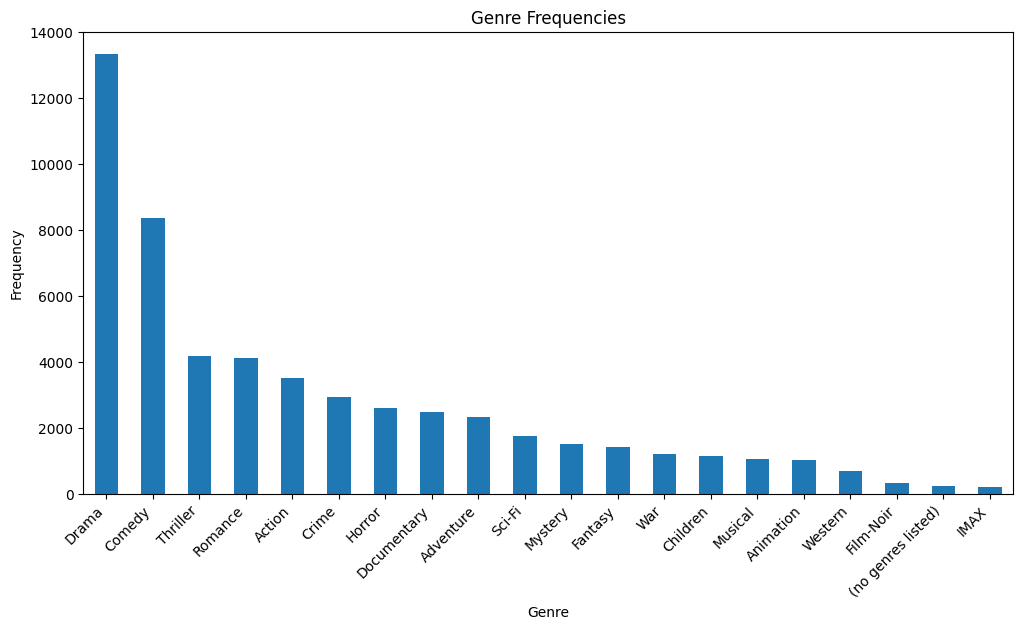

In [6]:
# Convert PySpark DataFrame to pandas DataFrame
movies_pd = movies.toPandas()

# Plot Genre Frequencies
plt.figure(figsize=(12, 6))
genre_counts = movies_pd['genres'].str.split('|', expand=True).stack().value_counts()
genre_counts.plot(kind='bar')
plt.title('Genre Frequencies')
plt.xlabel('Genre')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

provide a visual summary of the distribution of relevance scores in genome_scores, helping to understand the spread and concentration of different relevance score values.

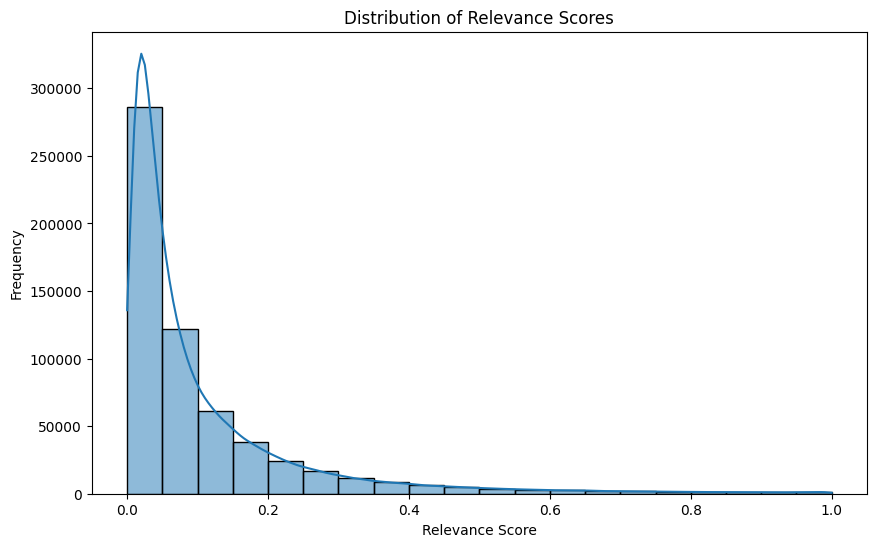

In [7]:
# Distribution of Relevance Scores
relevance_scores = genome_scores.select('relevance').rdd.flatMap(lambda x: x).collect()

# Plot the Distribution of Relevance Scores
plt.figure(figsize=(10, 6))
sns.histplot(relevance_scores, bins=20, kde=True)
plt.title('Distribution of Relevance Scores')
plt.xlabel('Relevance Score')
plt.ylabel('Frequency')
plt.show()


the below code prepares data by indexing genres, visualizes rating distribution and movie titles, and then employs collaborative filtering (ALS) to create movie recommendations for users.







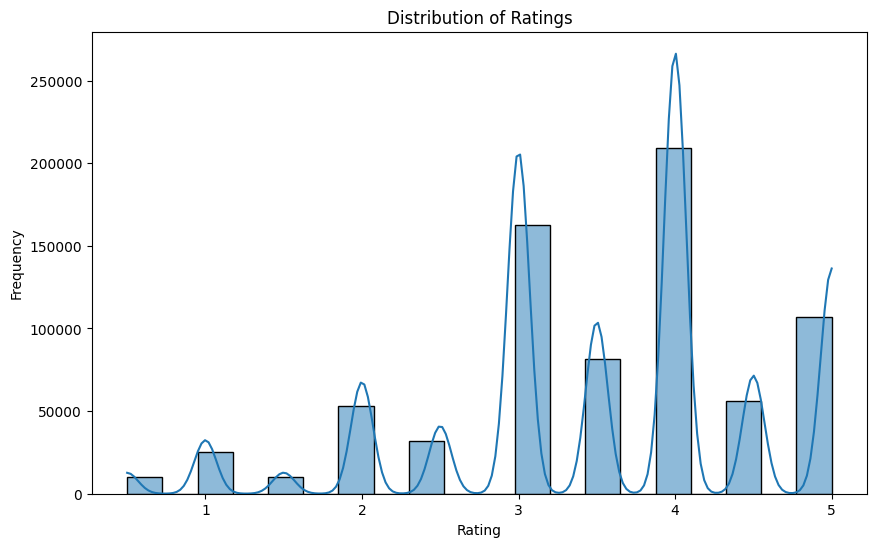

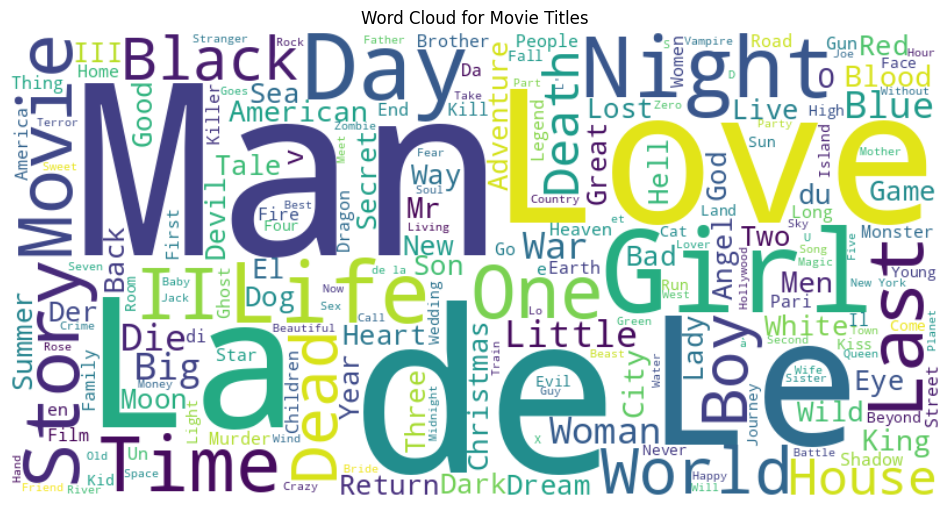

In [8]:
genre_indexer = StringIndexer(inputCol="genres", outputCol="genreIndex")
movies = genre_indexer.fit(movies).transform(movies)

# Data Visualization
# Distribution of Ratings
plt.figure(figsize=(10, 6))
sns.histplot(ratings.select('rating').rdd.flatMap(lambda x: x).collect(), bins=20, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

# Word cloud for movie titles
plt.figure(figsize=(12, 8))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(movies.select('title').rdd.flatMap(lambda x: x).collect()))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Movie Titles')
plt.show()

# Modeling (ALS Collaborative Filtering)
# Assuming you want to demonstrate a basic recommendation model
als = ALS(userCol="userId", itemCol="movieId", ratingCol="rating", coldStartStrategy="drop")
model = als.fit(ratings)

# Generate top 5 movie recommendations for each user
userRecs = model.recommendForAllUsers(5)

this code snippet shows the userId along with the list of recommended movieIds for each user, providing an overview of the collaborative filtering recommendations.

In [9]:
userRecs.select("userId", "recommendations.movieId").show(truncate=False)

+------+-----------------------------------+
|userId|movieId                            |
+------+-----------------------------------+
|1     |[95776, 40697, 82931, 59549, 6823] |
|3     |[95776, 59549, 40697, 82931, 727]  |
|5     |[5251, 6382, 95776, 4101, 32591]   |
|6     |[727, 6823, 95218, 26947, 112006]  |
|9     |[60007, 95776, 8986, 7625, 26280]  |
|12    |[95776, 82931, 59549, 4101, 54986] |
|13    |[60007, 95776, 53883, 93790, 7879] |
|15    |[4101, 727, 6823, 6982, 5607]      |
|16    |[6600, 8655, 6375, 7625, 95776]    |
|17    |[95776, 60007, 727, 93790, 82931]  |
|19    |[95776, 3805, 6382, 4454, 26947]   |
|20    |[66289, 82931, 95776, 39768, 26228]|
|22    |[95776, 6600, 82931, 40697, 5251]  |
|26    |[727, 95776, 6823, 90428, 82931]   |
|27    |[95776, 727, 82931, 31545, 90428]  |
|28    |[7918, 59549, 25774, 6930, 25771]  |
|31    |[3805, 868, 66915, 2741, 5251]     |
|34    |[95776, 6823, 6382, 82931, 727]    |
|35    |[82931, 50356, 50354, 95776, 77240]|
|37    |[6